In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import seaborn as sns
# change path to processed db and remove processing
db_file_path = 'C:/Users/U/Documents/4.Semester/Masterarbeit/concept_implementation/data/can_data_processed_23112023.db'
conn = sqlite3.connect(db_file_path)
query = "SELECT * FROM ProcessedCANData"
df = pd.read_sql_query(query, conn)
conn.close()

In [2]:
len(df["Amb_Temp"]) - np.sum(df["Amb_Temp"] == 0) - np.sum(df["Amb_Temp"] == np.nan)

18157

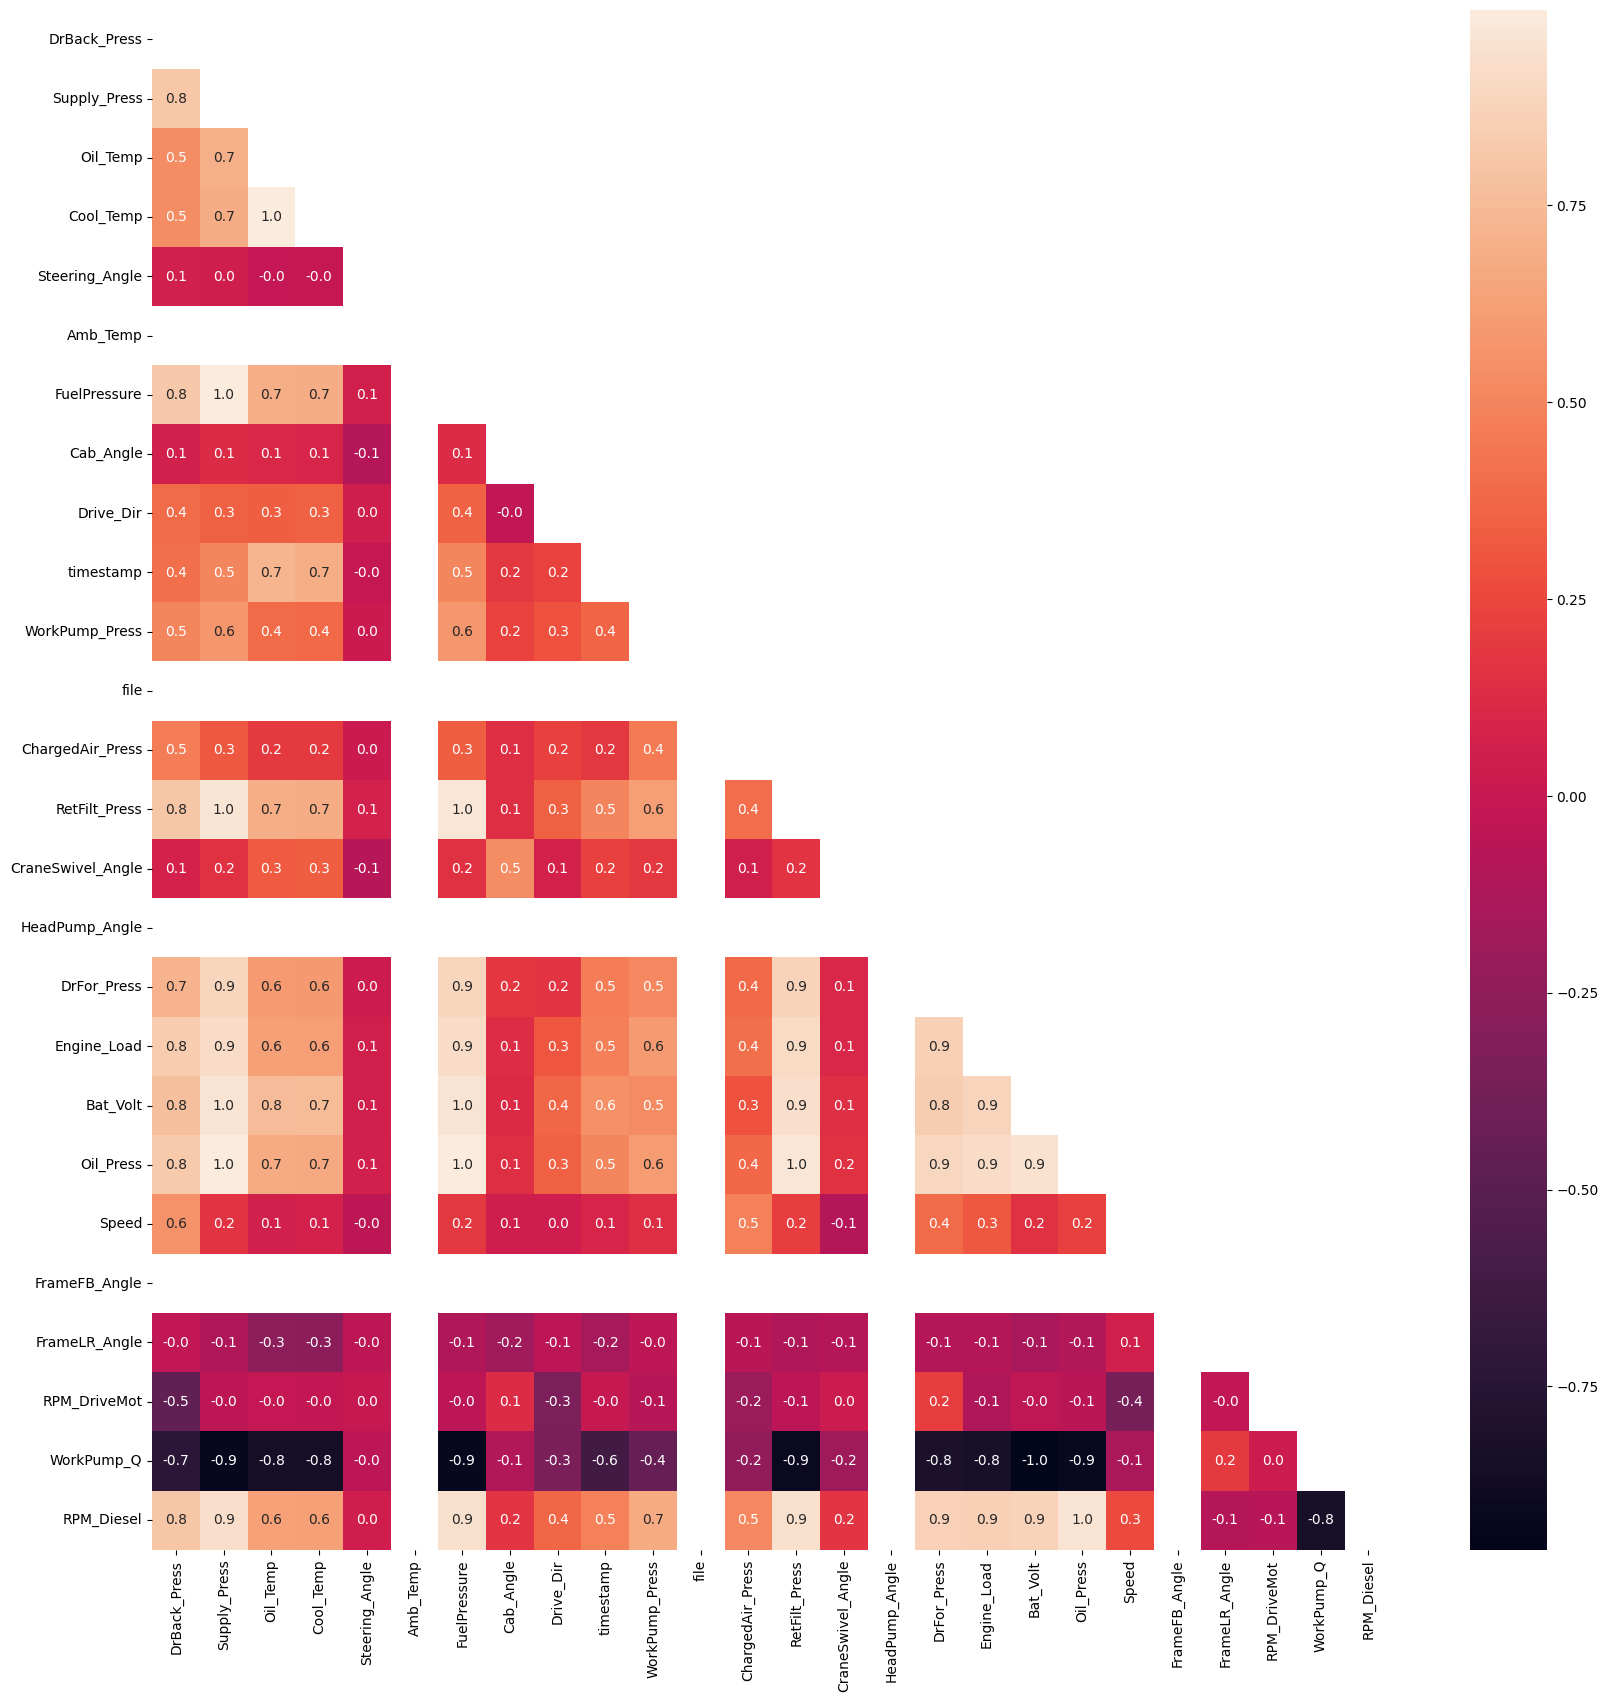

In [3]:
plt.figure(figsize=(20, 20))

corr_matrix = df.loc[:, df.columns != 'datetime'].corr() #  Pearson's correlation coefficient
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, fmt=".1f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
plt.style.use('seaborn-v0_8-whitegrid')

def freedman_diaconis_bins(data):
    data = data.astype(float)
    if len(data) > 1 and data.nunique() > 1:  
        quartile_range = np.percentile(data, 75) - np.percentile(data, 25)
        if quartile_range == 0:
            return 1  
        bin_width = 2 * quartile_range * (len(data) ** (-1/3))
        num_bins = (data.max() - data.min()) / bin_width
        return max(1, round(num_bins))  
    else:
        return 1  

def remove_outliers(df, column, multiplier=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:  # Handle case where all data points are the same
        return df
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:
for column in df.columns:
    if df[column].isna().all():
        continue
    
    data = df[column].dropna()
    bins = freedman_diaconis_bins(data) if len(data) > 1 else 1

    plt.figure(figsize=(10, 4))
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7, density=True)
    sns.histplot(df[column], bins=20, kde=True)

    data.plot(kind='kde', color='red', alpha=0.5)

    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [4]:
cleaned_df = df.copy()

for column in df.columns:
    if df[column].dtype in ['float64', 'int64'] and df[column].nunique() > 1:
        cleaned_df = remove_outliers(cleaned_df, column)

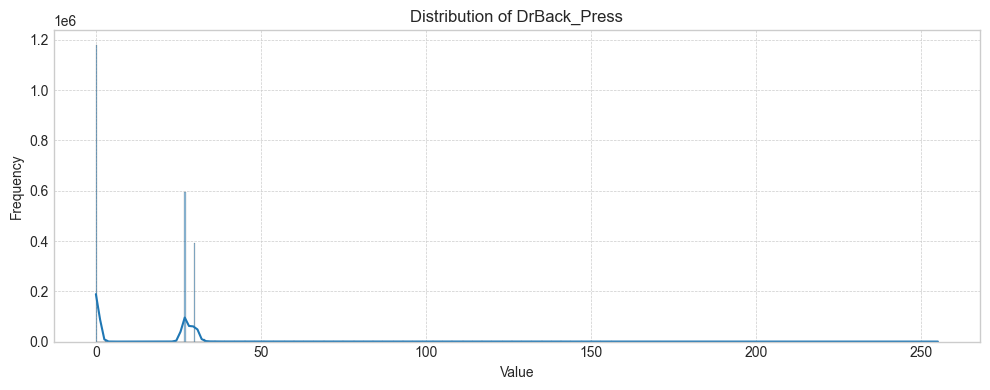

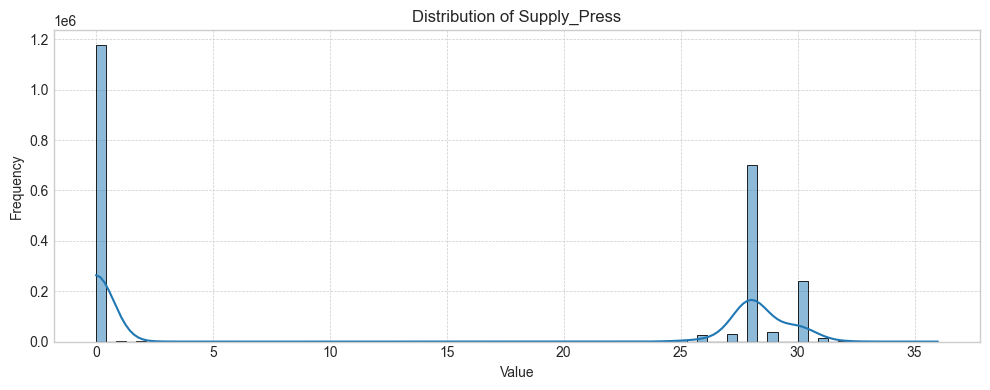

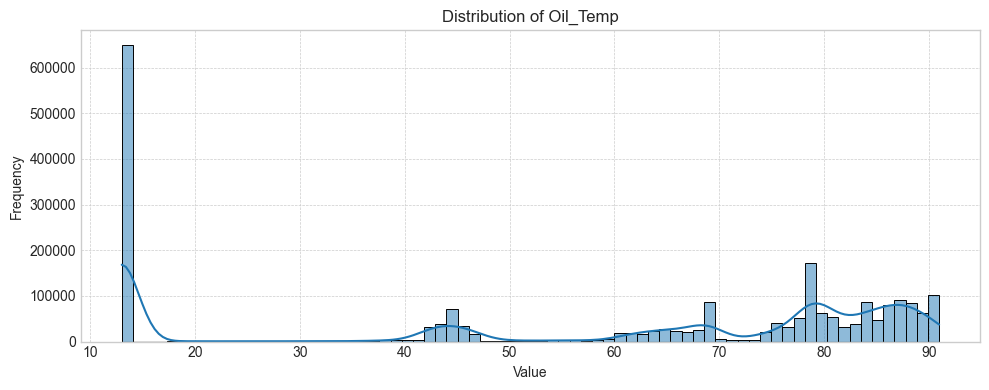

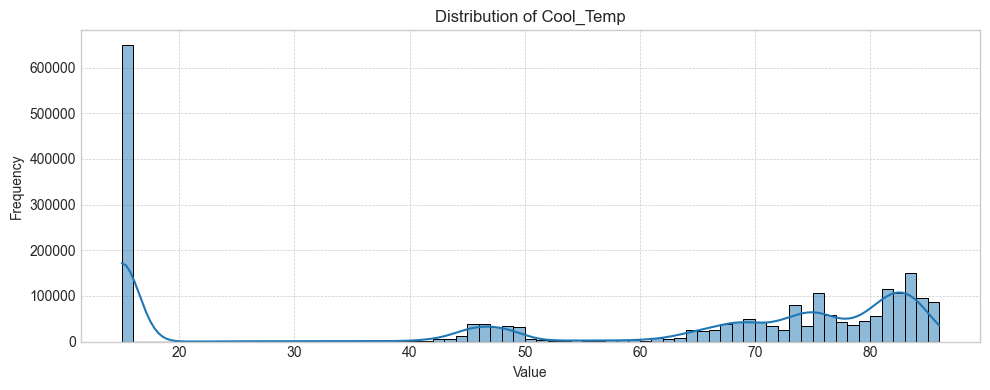

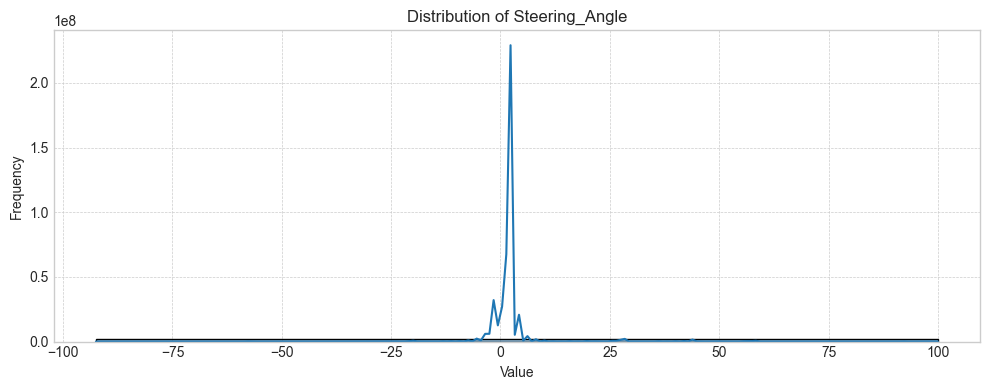

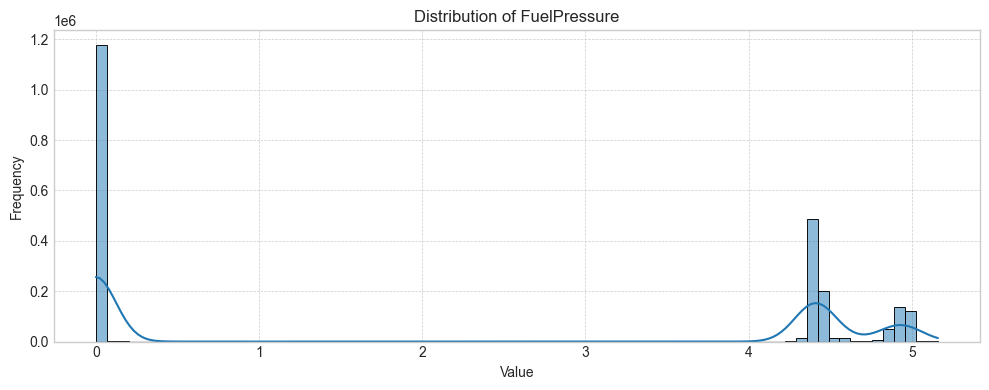

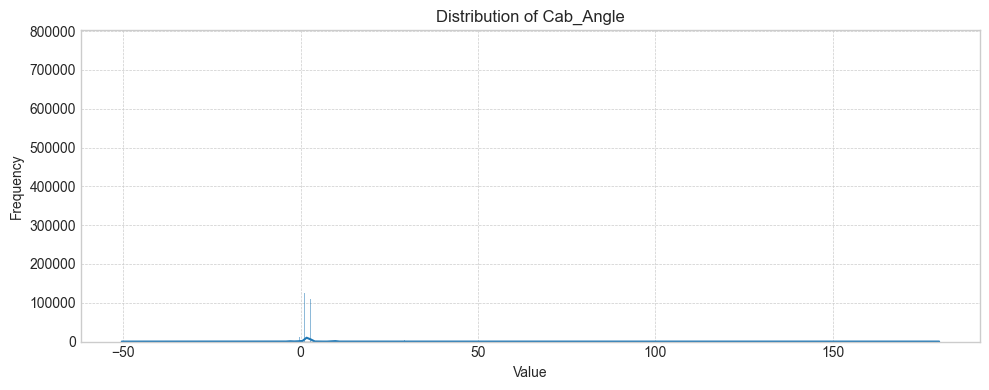

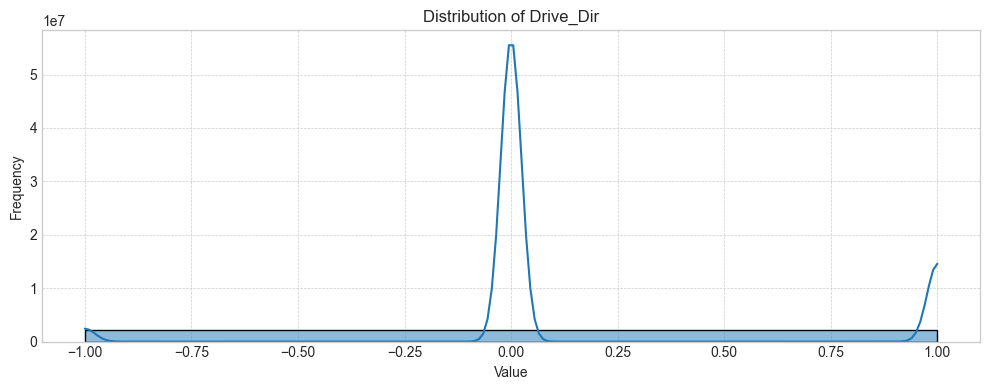

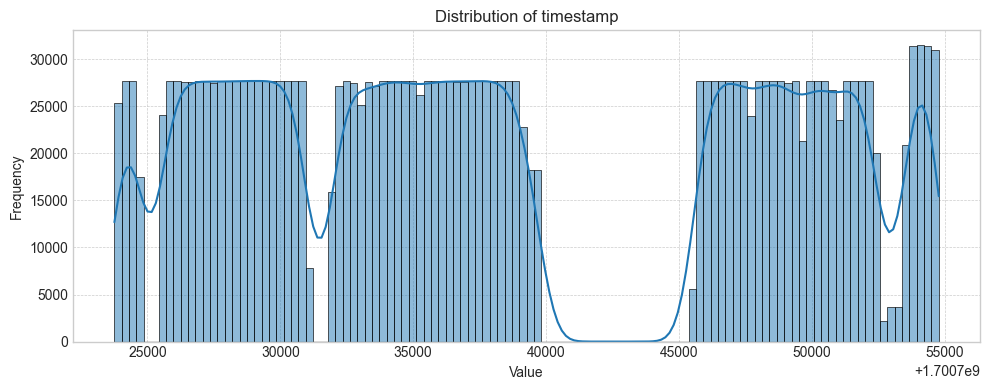

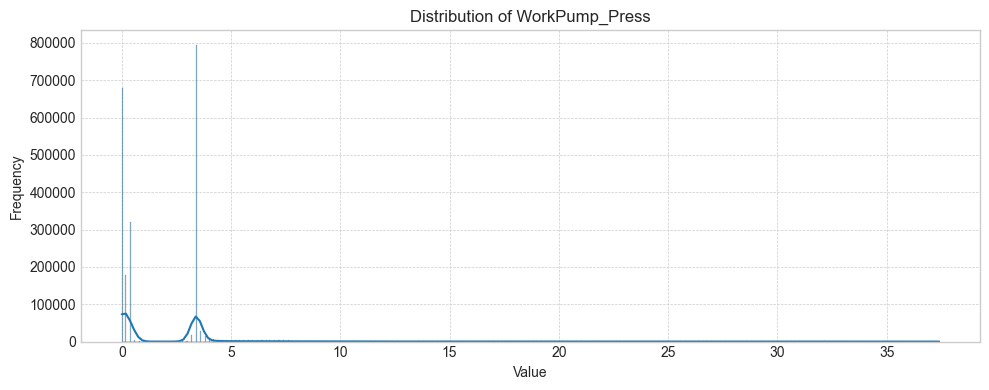

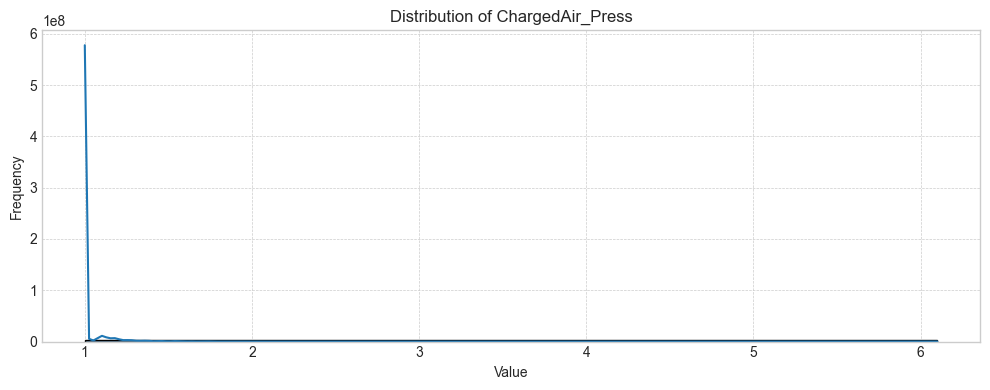

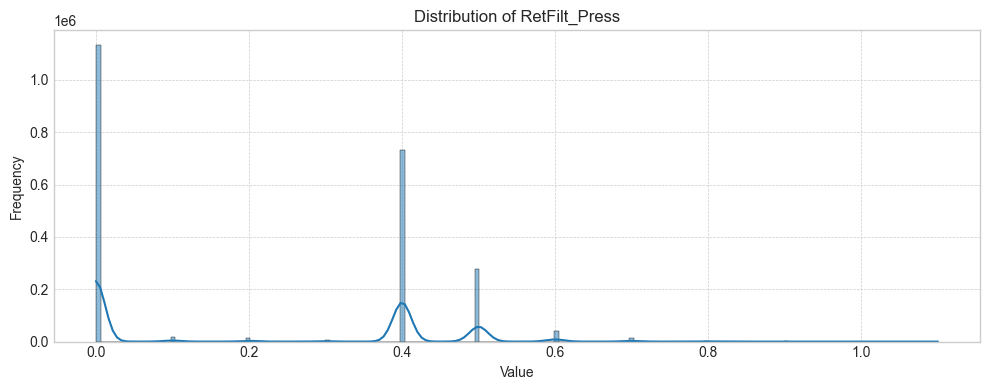

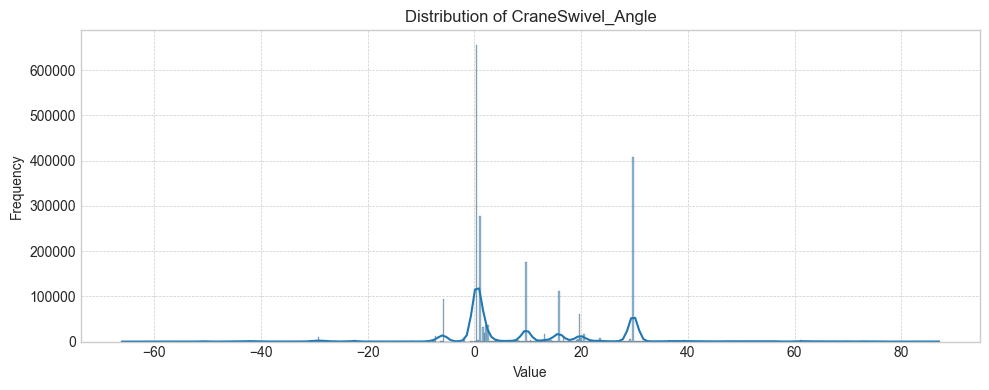

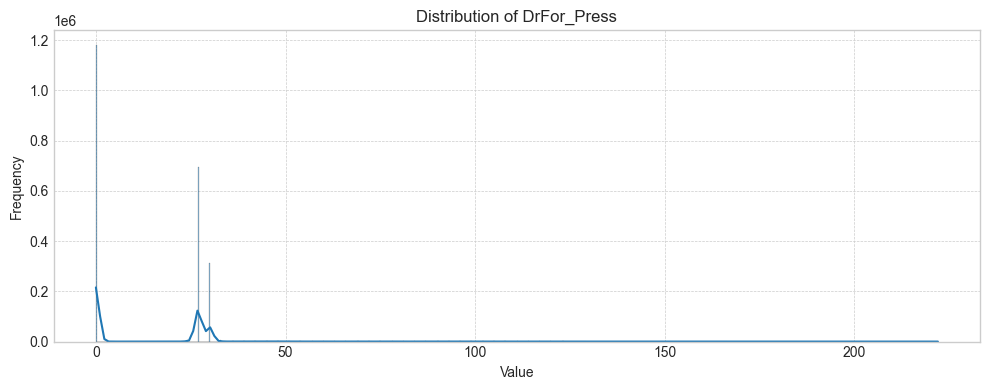

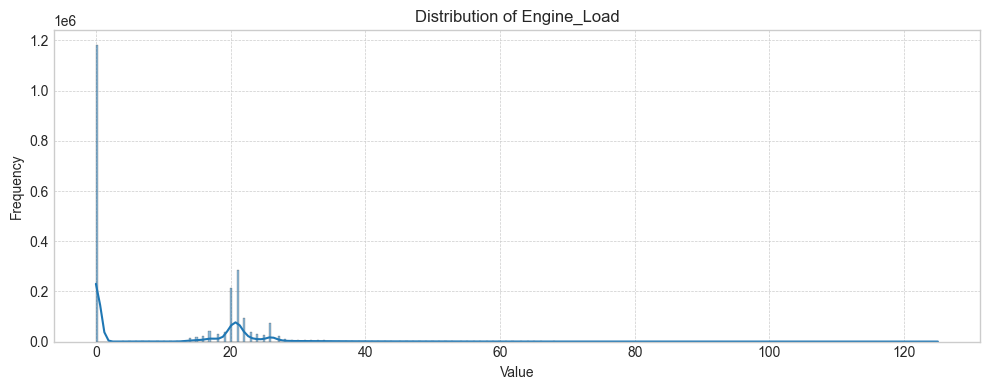

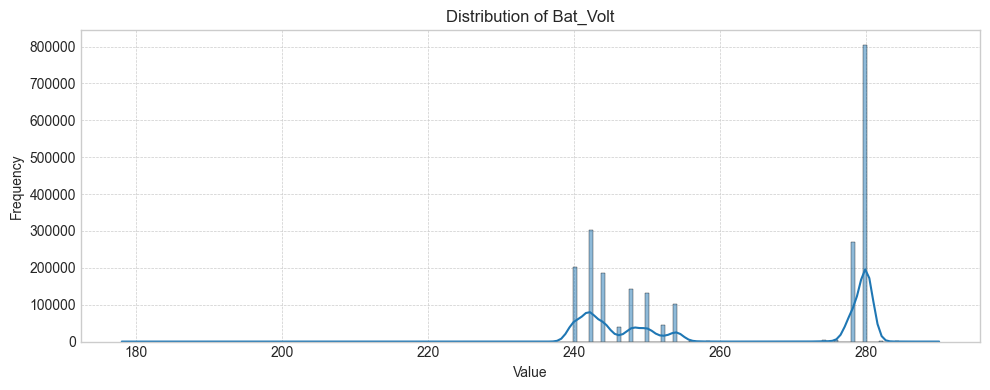

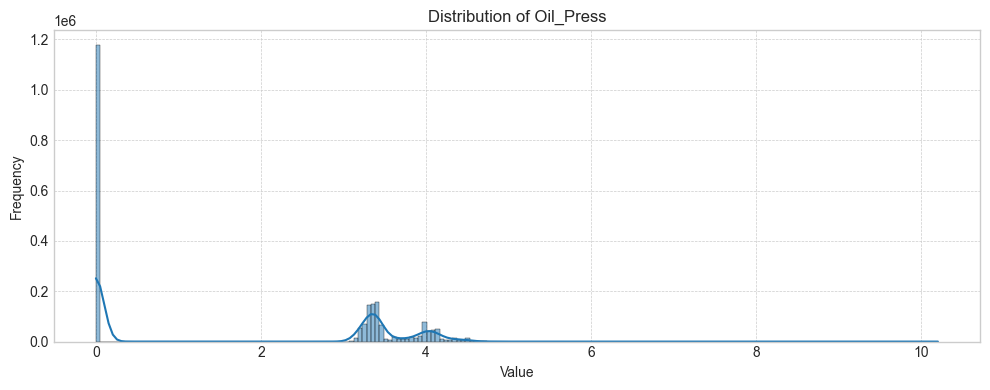

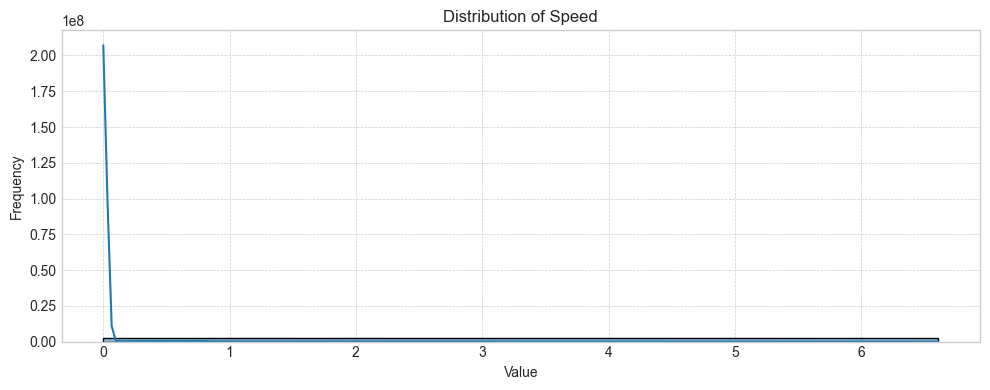

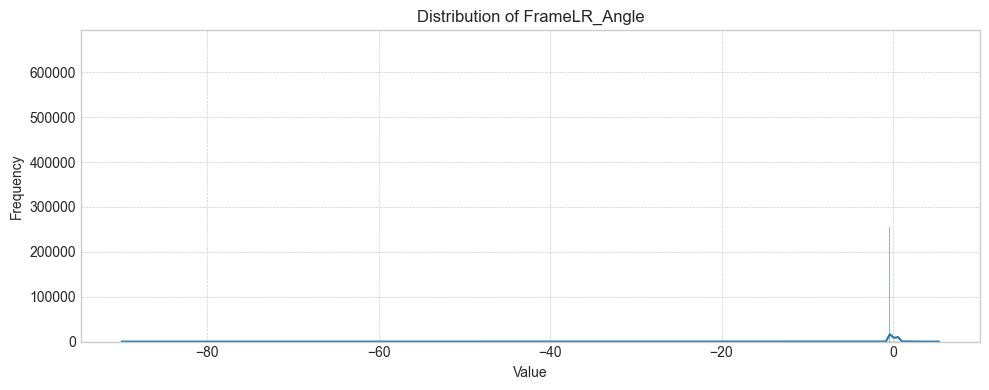

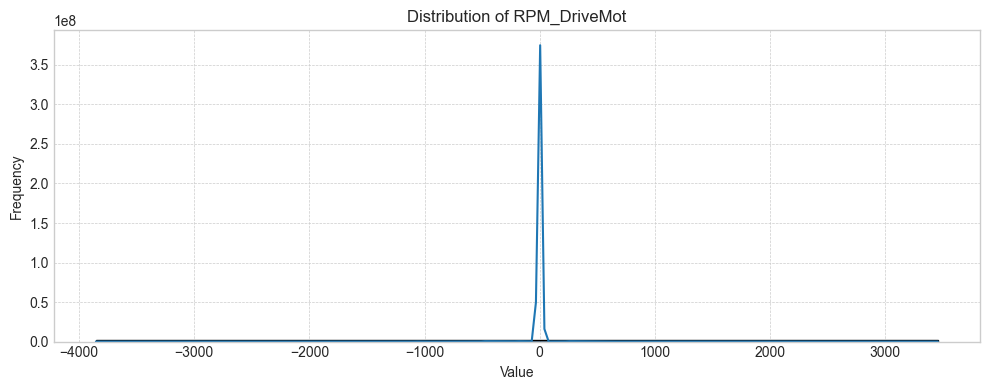

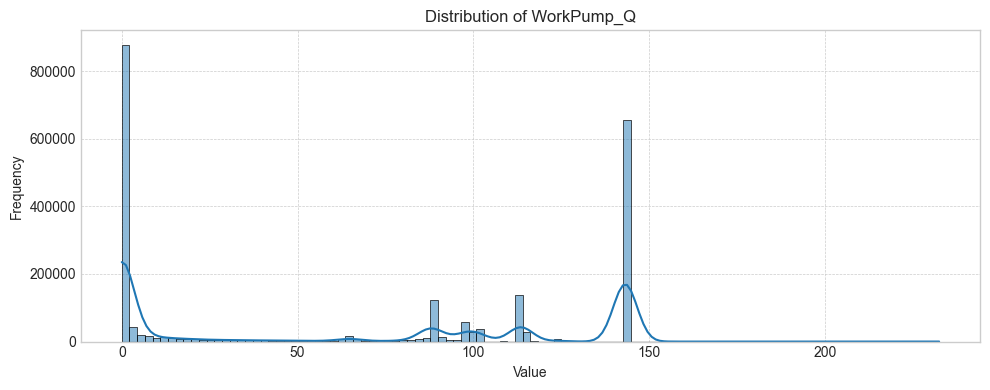

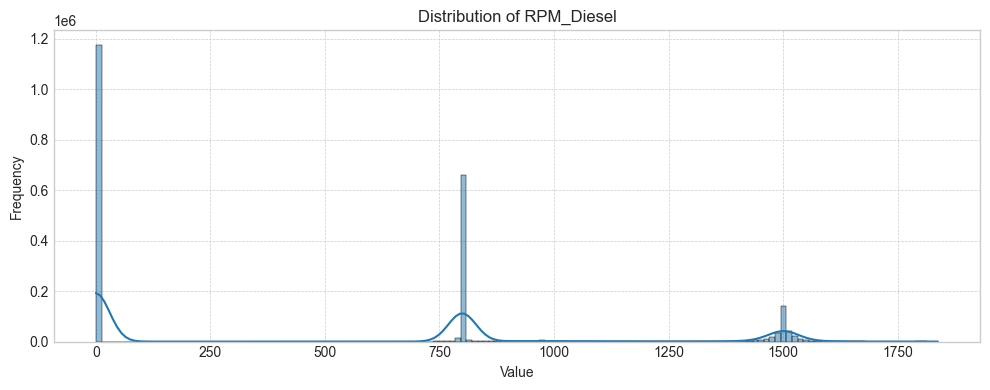

c:\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6831: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6832: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

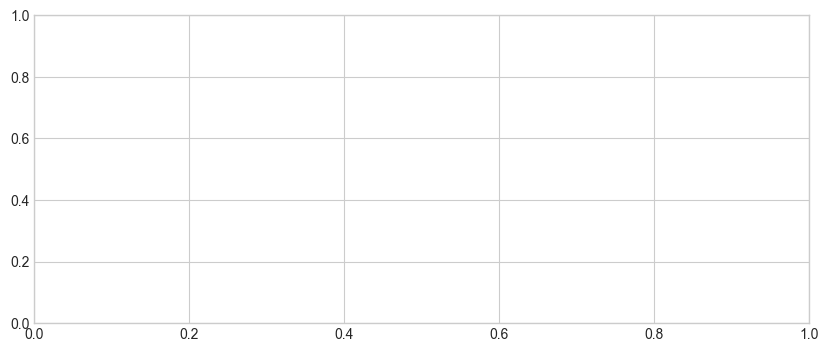

In [6]:
plt.style.use('seaborn-v0_8-whitegrid')

for column in cleaned_df.columns:
    if cleaned_df[column].isna().all()  or df[column].nunique() == 1:
        continue
    try:
        data = pd.to_numeric(df[column].dropna(), errors='coerce')
        bins = freedman_diaconis_bins(data) if len(data) > 1 else 1
    except ValueError:
        continue

    plt.figure(figsize=(10, 4))
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7, density=True)

    if data.nunique() != 1:  
        sns.histplot(data, bins=bins, kde=True)

    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    plt.show()


In [ ]:
descriptive_stats = df.describe()

skewness = df.skew()
kurtosis = df.kurtosis()

all_stats = pd.concat([descriptive_stats, skewness, kurtosis], axis=1)
all_stats.rename({0: 'skewness', 1: 'kurtosis'}, inplace=True)

correlation_matrix = df.corr()

print(all_stats)
print(correlation_matrix)

In [ ]:
descriptive_stats = cleaned_df.describe()

skewness = cleaned_df.skew()
kurtosis = cleaned_df.kurtosis()

all_stats = pd.concat([descriptive_stats, skewness, kurtosis], axis=1)
all_stats.rename({0: 'skewness', 1: 'kurtosis'}, inplace=True)

correlation_matrix = df.corr()

print(all_stats)
print(correlation_matrix)

In [ ]:
# Predictive Modeling: Building models to predict certain outcomes (like maintenance needs or performance metrics) based on this data.